In [79]:
import numpy as np
import matplotlib.pyplot as plt

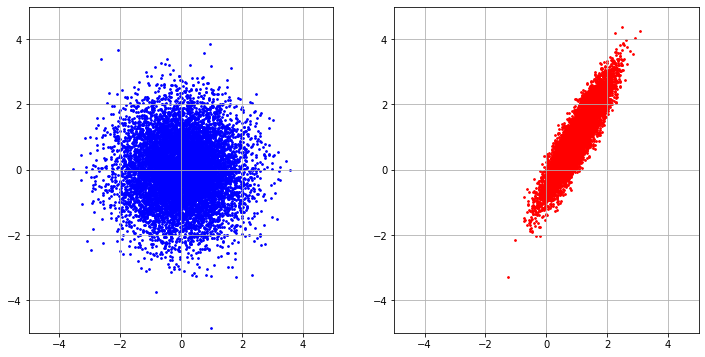

In [72]:
X = np.random.normal (0, 1, (10000,2) ) 

phi = np.pi/6
R = np.array([[ np.cos(phi), np.sin(phi)],       # rotation matrix
              [-np.sin(phi), np.cos(phi)] ])

Y = X * np.array([[0.2, 1.]])                    # compress
Y = Y @ R.T                                      # rotate
Y += np.array([[1., 1.]])                        # shift

plt.figure(figsize=(12, 6), facecolor ='w')      
ax = plt.subplot(1,2,1); ax.grid();  ax.set( ylim=(-5, 5), xlim=(-5, 5) )    
plt.scatter(X[:,0],X[:,1], c="b", s=3)
ax = plt.subplot(1,2,2); ax.grid();  ax.set( ylim=(-5, 5), xlim=(-5, 5) )    
plt.scatter(Y[:,0],Y[:,1], c="r", s=3)
plt.show()

In [76]:
np.set_printoptions(precision=2, suppress=True)  

print( np.corrcoef(X.T) )
print( np.corrcoef(Y.T) )

[[ 1. -0.]
 [-0.  1.]]
[[1.  0.9]
 [0.9 1. ]]


[[0.28 0.41]
 [0.41 0.75]]


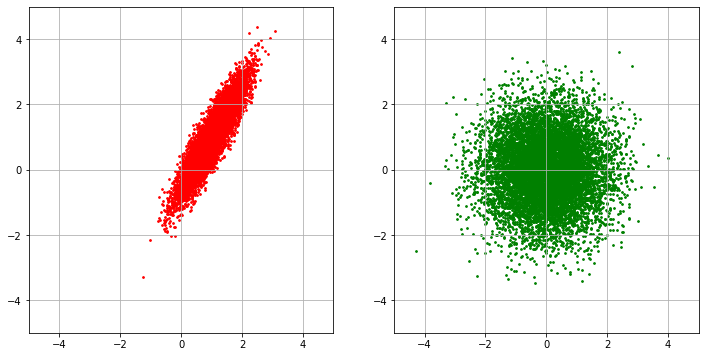

In [78]:
#cov = np.corrcoef(Y.T)
cov = np.cov(Y.T)
print(cov)

L = np.linalg.cholesky(cov)

L = np.linalg.inv(L)
Z = Y @ L.T
Z -= Z.mean(axis=0, keepdims=True)

plt.figure(figsize=(12, 6), facecolor ='w')      
ax = plt.subplot(1,2,1); ax.grid();  ax.set( ylim=(-5, 5), xlim=(-5, 5) )    
plt.scatter(Y[:,0],Y[:,1], c="r", s=3)
ax = plt.subplot(1,2,2); ax.grid();  ax.set( ylim=(-5, 5), xlim=(-5, 5) )    
plt.scatter(Z[:,0],Z[:,1], c="g", s=3)
plt.show()

In [58]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

X = np.arange(20)
Y = np.array([0]*5+[1]*5+[2]*5+[3]*5)

for _ in range(5):
    X_trn, X_val, Y_trn, Y_val = train_test_split(X, Y, test_size=0.2, stratify=Y)
    print("%s %s" % (Y_trn, Y_val))

[1 2 0 3 0 2 0 3 3 1 2 1 2 0 3 1] [1 3 0 2]
[2 2 3 0 0 3 0 3 3 2 1 1 2 1 0 1] [0 2 3 1]
[1 1 3 1 0 3 2 3 0 2 2 0 2 1 0 3] [0 3 1 2]
[3 2 0 3 1 3 3 0 1 2 1 2 1 0 2 0] [2 1 0 3]
[3 2 0 2 0 2 2 1 0 1 3 0 3 1 3 1] [3 0 1 2]


In [18]:
import torch
x = torch.tensor([[1., 1.],
                  [3., 4.]])
print(torch.cdist(x, x, p=2)**2)

print(((x[0]-x[1])**2).sum())

tensor([[ 0., 13.],
        [13.,  0.]])
tensor(13.)
